In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
real = pd.read_csv('real32/results.csv')
gym = pd.read_csv('gym32/results.csv')
static = pd.read_csv('static32/results.csv')
dynamic = pd.read_csv('dynamic32/results.csv')
extreme = pd.read_csv('extreme32/results.csv')

In [6]:
real.head()

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,0,1.2185,1.75370,0.93252,0.84570,0.84215,0.91049,0.55784,1.05130,0.59423,0.88591,0.070682,0.003258,0.003258
1,1,1.1731,0.79650,0.92434,0.91307,0.91945,0.94587,0.60455,0.98859,1.26270,0.88698,0.040660,0.006569,0.006569
2,2,1.2871,0.82420,0.92076,0.87341,0.82527,0.88407,0.47143,1.27750,0.73426,0.93392,0.010616,0.009859,0.009859
3,3,1.3278,0.77986,0.93238,0.89059,0.85273,0.90450,0.49492,1.24870,0.91698,0.95399,0.009901,0.009901,0.009901
4,4,1.2870,0.67773,0.93167,0.86488,0.80716,0.85802,0.46809,1.29250,0.89694,0.96290,0.009901,0.009901,0.009901


In [7]:
# all headers

print(real.columns)

Index(['                  epoch', '         train/box_loss',
       '         train/cls_loss', '         train/dfl_loss',
       '   metrics/precision(B)', '      metrics/recall(B)',
       '       metrics/mAP50(B)', '    metrics/mAP50-95(B)',
       '           val/box_loss', '           val/cls_loss',
       '           val/dfl_loss', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')


In [12]:
# each dataset has the name for each row as follows
['                  epoch', '         train/box_loss',
       '         train/cls_loss', '         train/dfl_loss',
       '   metrics/precision(B)', '      metrics/recall(B)',
       '       metrics/mAP50(B)', '    metrics/mAP50-95(B)',
       '           val/box_loss', '           val/cls_loss',
       '           val/dfl_loss', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2']

# They all have weird spaces in the beginning, so we need to remove them
real.columns = [x.strip() for x in real.columns]
gym.columns = [x.strip() for x in gym.columns]
static.columns = [x.strip() for x in static.columns]
dynamic.columns = [x.strip() for x in dynamic.columns]
extreme.columns = [x.strip() for x in extreme.columns]


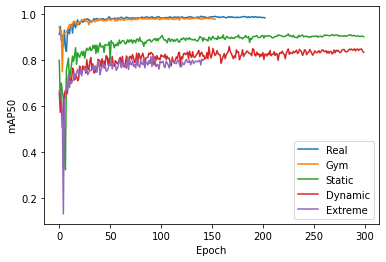

In [41]:
# Plot the epoch vs mAP50 for each dataset
plt.plot(real['epoch'], real['metrics/mAP50(B)'], label='Real')
plt.plot(gym['epoch'], gym['metrics/mAP50(B)'], label='Gym')
plt.plot(static['epoch'], static['metrics/mAP50(B)'], label='Static')
plt.plot(dynamic['epoch'], dynamic['metrics/mAP50(B)'], label='Dynamic')
plt.plot(extreme['epoch'], extreme['metrics/mAP50(B)'], label='Extreme')

plt.xlabel('Epoch')
plt.ylabel('mAP50')
plt.legend()
plt.show()

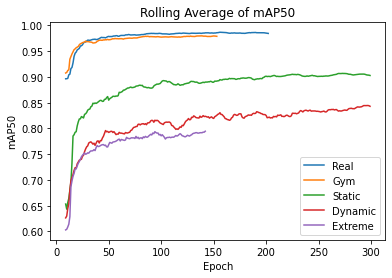

In [42]:
# Now do the same, but apply a rolling average to smooth out the curve
plt.plot(real['epoch'], real['metrics/mAP50(B)'].rolling(10).mean(), label='Real')
plt.plot(gym['epoch'], gym['metrics/mAP50(B)'].rolling(10).mean(), label='Gym')
plt.plot(static['epoch'], static['metrics/mAP50(B)'].rolling(10).mean(), label='Static')
plt.plot(dynamic['epoch'], dynamic['metrics/mAP50(B)'].rolling(10).mean(), label='Dynamic')
plt.plot(extreme['epoch'], extreme['metrics/mAP50(B)'].rolling(10).mean(), label='Extreme')

plt.xlabel('Epoch')
plt.ylabel('mAP50')
plt.legend()
plt.title('Rolling Average of mAP50')
plt.savefig('plots/train_mAP50.png', dpi=300)
plt.show()

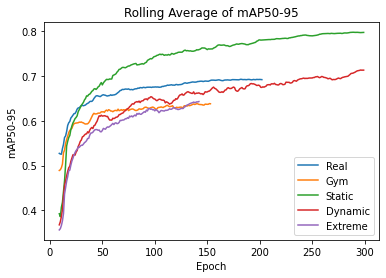

In [43]:
# Do the same for mAP50-95
plt.plot(real['epoch'], real['metrics/mAP50-95(B)'].rolling(10).mean(), label='Real')
plt.plot(gym['epoch'], gym['metrics/mAP50-95(B)'].rolling(10).mean(), label='Gym')
plt.plot(static['epoch'], static['metrics/mAP50-95(B)'].rolling(10).mean(), label='Static')
plt.plot(dynamic['epoch'], dynamic['metrics/mAP50-95(B)'].rolling(10).mean(), label='Dynamic')
plt.plot(extreme['epoch'], extreme['metrics/mAP50-95(B)'].rolling(10).mean(), label='Extreme')

plt.xlabel('Epoch')
plt.ylabel('mAP50-95')
plt.legend()
plt.title('Rolling Average of mAP50-95')
plt.savefig('plots/train_mAP50-95.png', dpi=300)
plt.show()

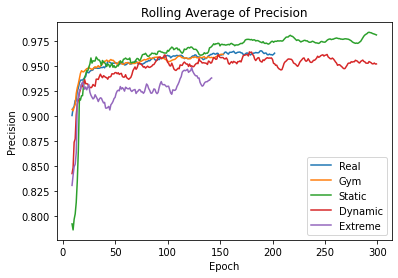

In [44]:
# Do the same for precision
plt.plot(real['epoch'], real['metrics/precision(B)'].rolling(10).mean(), label='Real')
plt.plot(gym['epoch'], gym['metrics/precision(B)'].rolling(10).mean(), label='Gym')
plt.plot(static['epoch'], static['metrics/precision(B)'].rolling(10).mean(), label='Static')
plt.plot(dynamic['epoch'], dynamic['metrics/precision(B)'].rolling(10).mean(), label='Dynamic')
plt.plot(extreme['epoch'], extreme['metrics/precision(B)'].rolling(10).mean(), label='Extreme')

plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.title('Rolling Average of Precision')
plt.savefig('plots/train_precision.png', dpi=300)
plt.show()

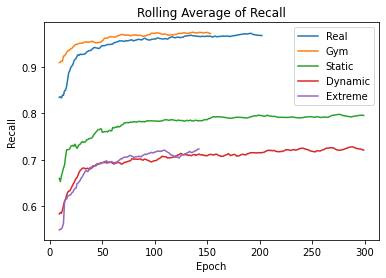

In [45]:
# Do the same for recall
plt.plot(real['epoch'], real['metrics/recall(B)'].rolling(10).mean(), label='Real')
plt.plot(gym['epoch'], gym['metrics/recall(B)'].rolling(10).mean(), label='Gym')
plt.plot(static['epoch'], static['metrics/recall(B)'].rolling(10).mean(), label='Static')
plt.plot(dynamic['epoch'], dynamic['metrics/recall(B)'].rolling(10).mean(), label='Dynamic')
plt.plot(extreme['epoch'], extreme['metrics/recall(B)'].rolling(10).mean(), label='Extreme')

plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.title('Rolling Average of Recall')
plt.savefig('plots/train_recall.png', dpi=300)
plt.show()

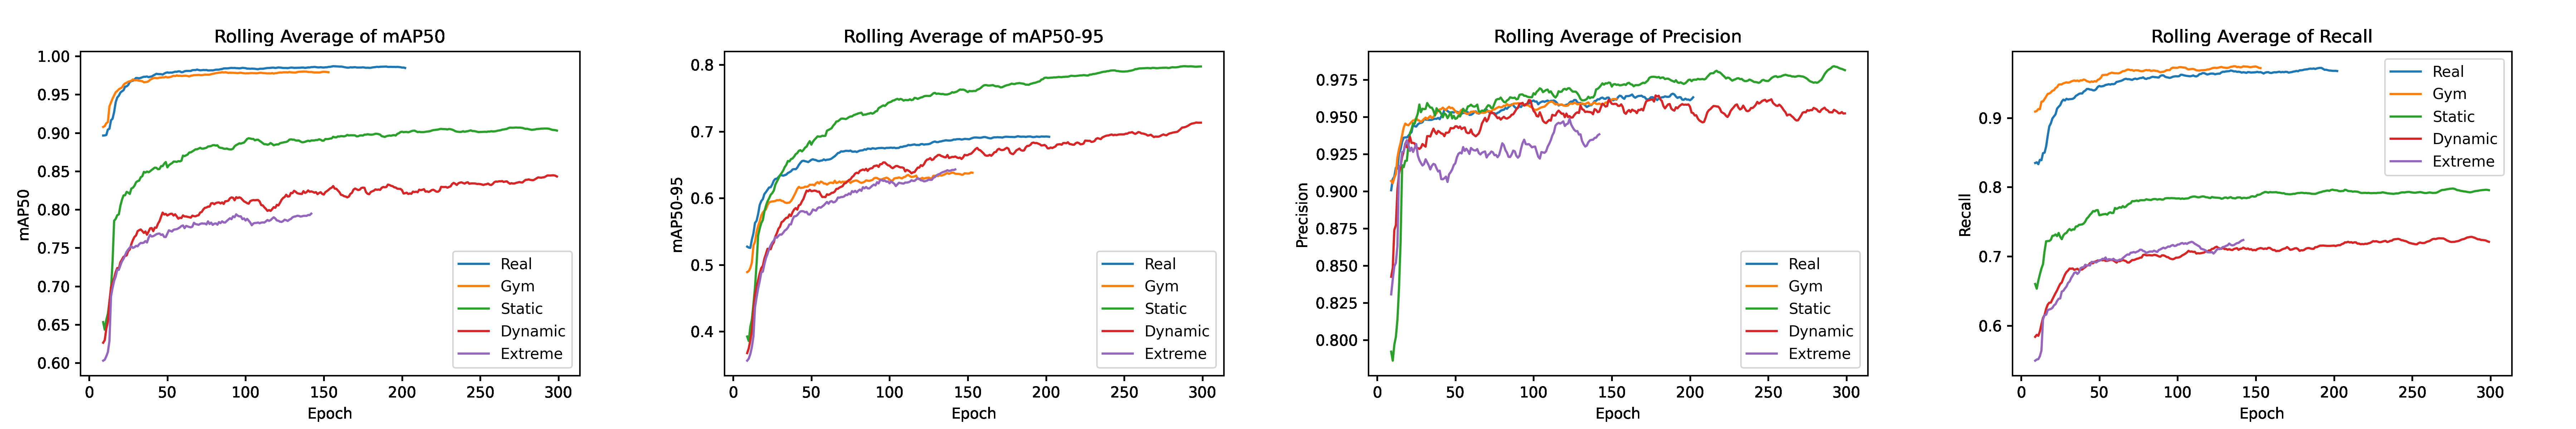

In [46]:
# Combine the 4 images into a 2x2 grid for easy viewing
from PIL import Image

images = [Image.open(x) for x in ['plots/train_mAP50.png', 'plots/train_mAP50-95.png', 'plots/train_precision.png', 'plots/train_recall.png']]
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

new_im = Image.new('RGB', (total_width, max_height))

x_offset = 0
for im in images:
    new_im.paste(im, (x_offset,0))
    x_offset += im.size[0]

new_im.save('plots/train_metrics.png')
Image.open('plots/train_metrics.png')

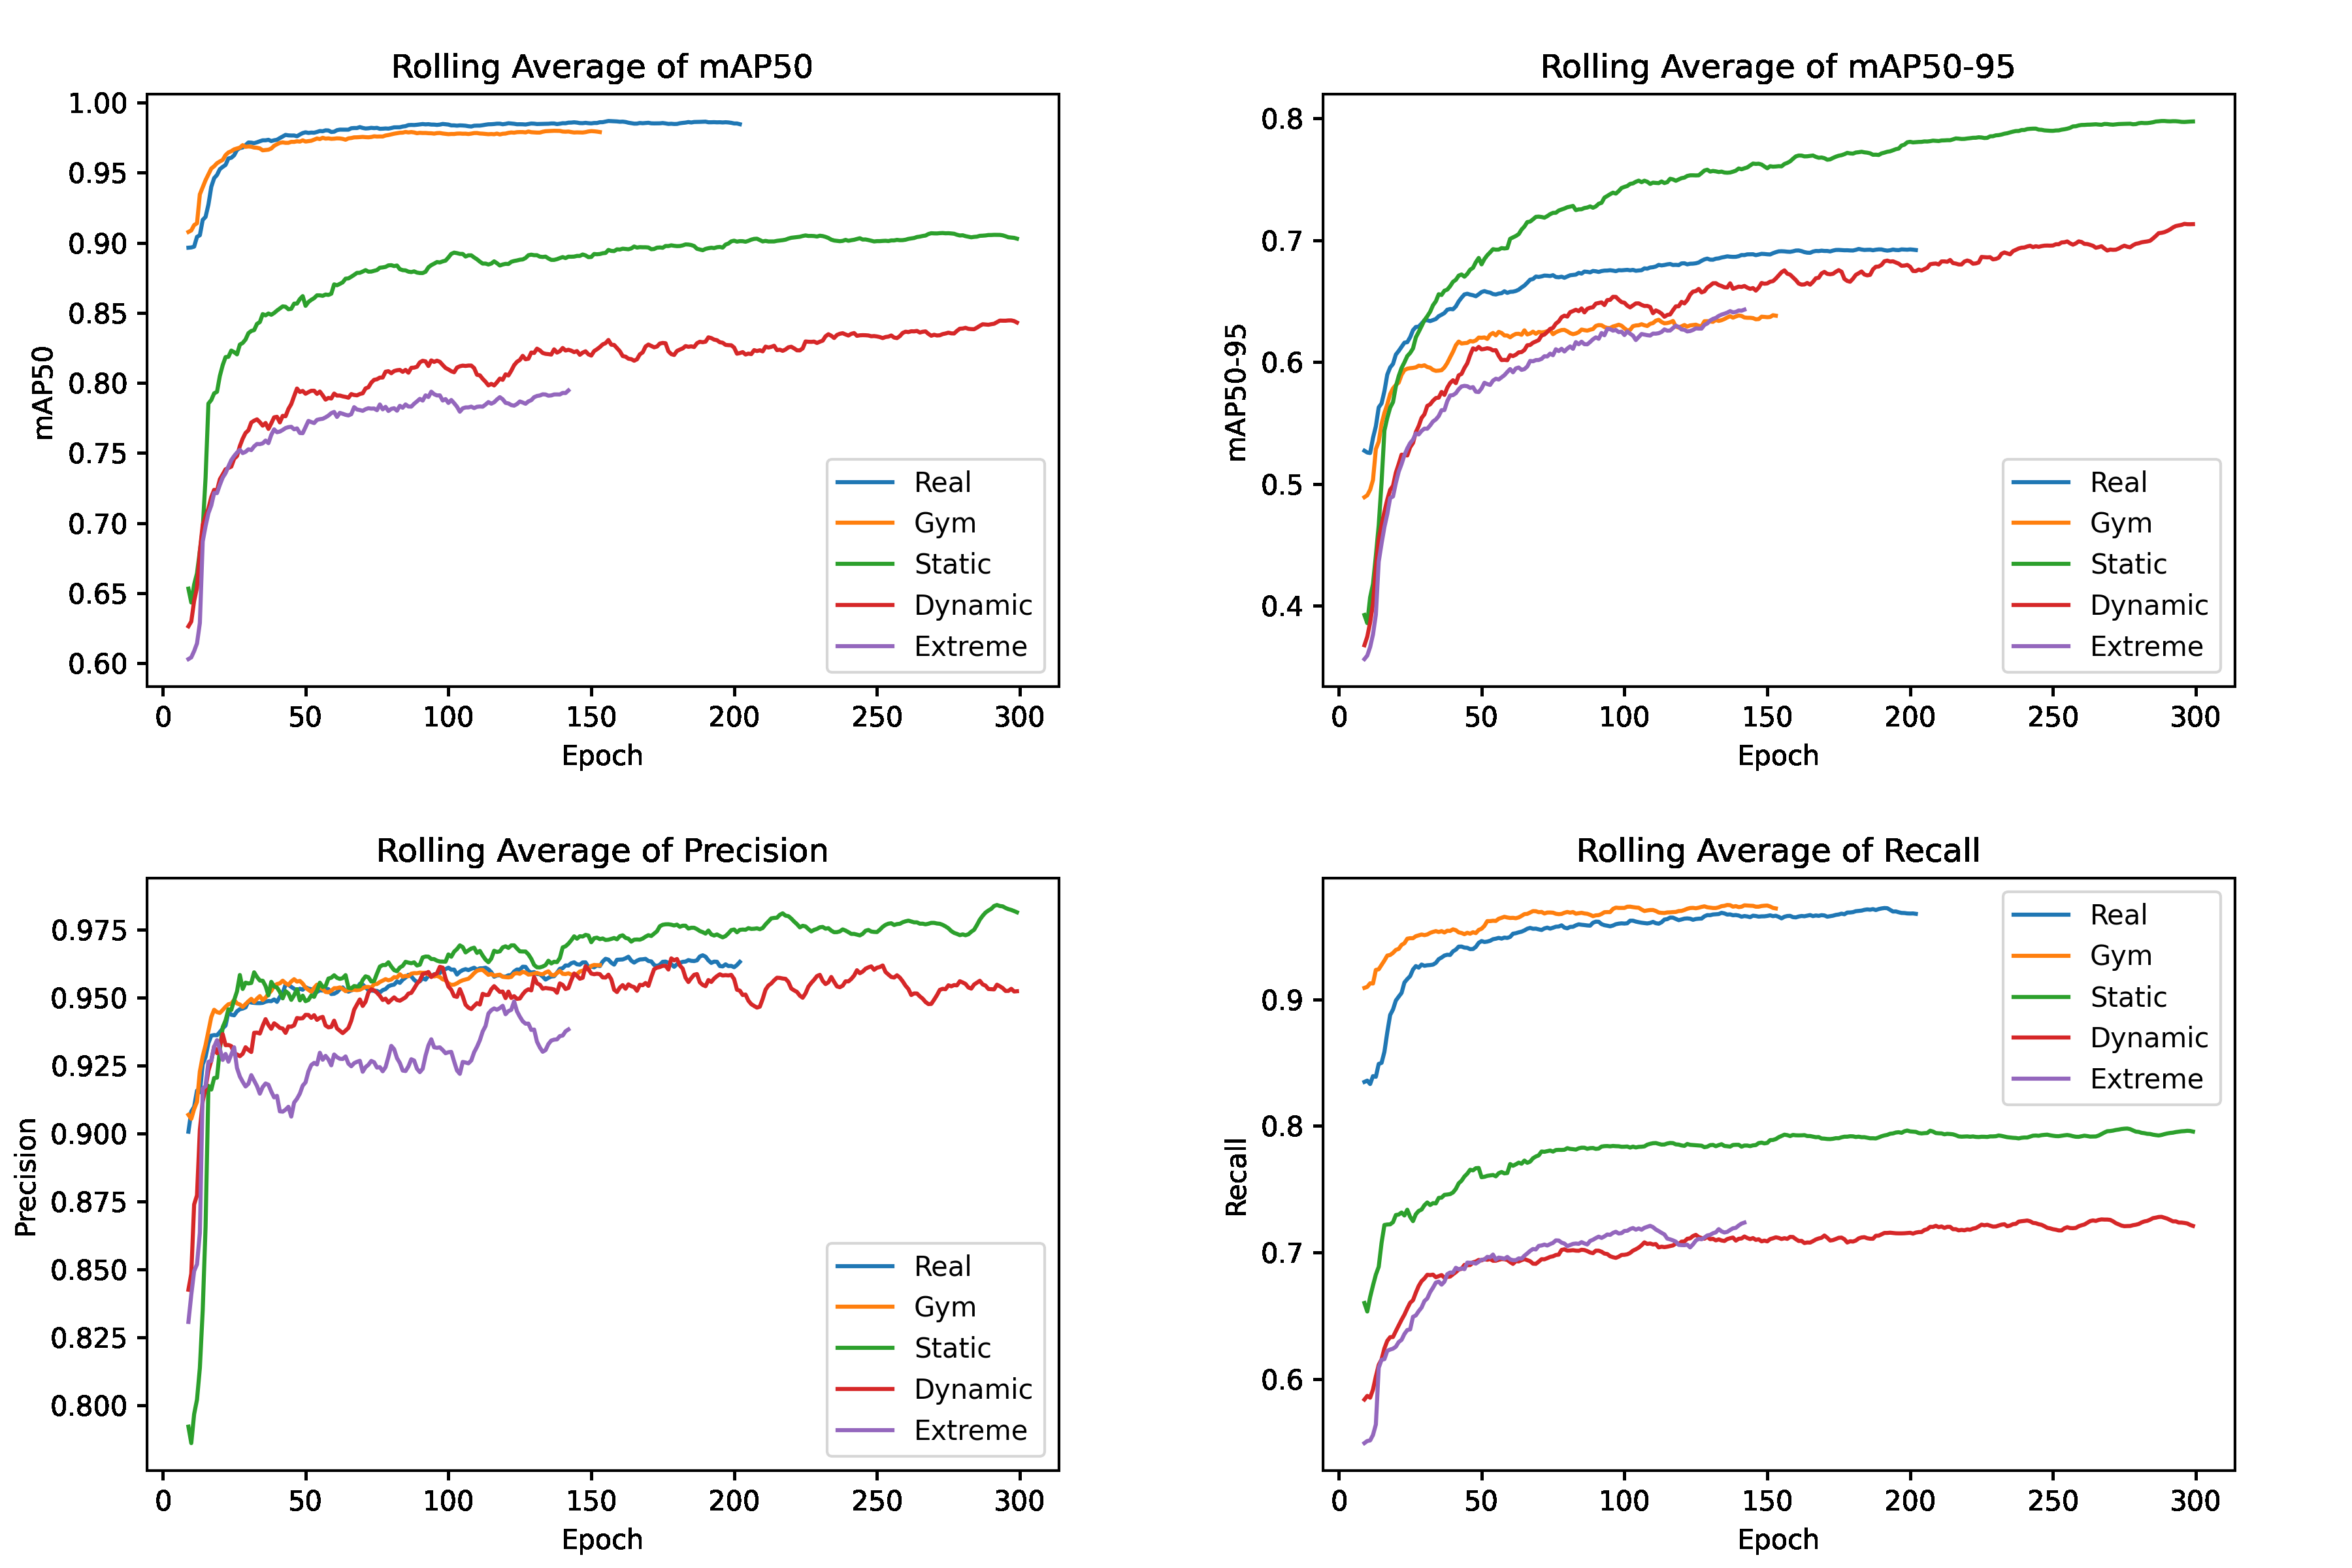

In [47]:
# Its now 4x1, make it 2x2
from PIL import Image

images = [Image.open(x) for x in ['plots/train_mAP50.png', 'plots/train_mAP50-95.png', 'plots/train_precision.png', 'plots/train_recall.png']]
widths, heights = zip(*(i.size for i in images))

total_width = max(widths) * 2
max_height = max(heights) * 2

new_im = Image.new('RGB', (total_width, max_height))

x_offset = 0
y_offset = 0
for im in images:
    new_im.paste(im, (x_offset,y_offset))
    x_offset += im.size[0]
    if x_offset >= total_width:
        x_offset = 0
        y_offset += im.size[1]

new_im.save('plots/train_metrics2.png')
Image.open('plots/train_metrics2.png')
